In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

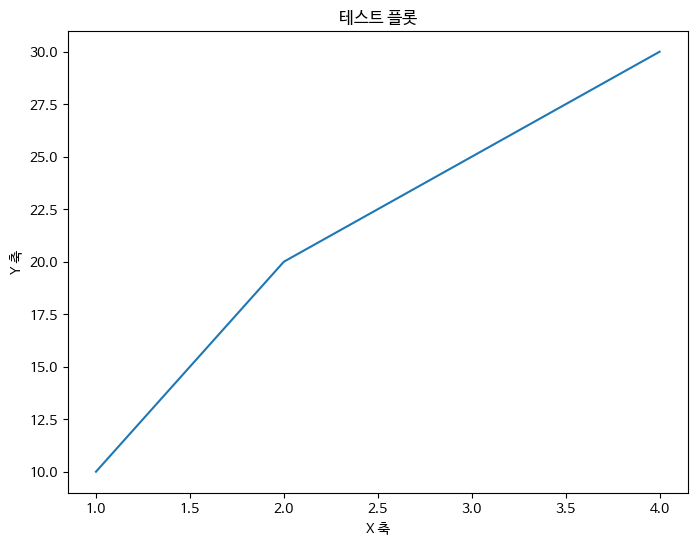

In [1]:
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

# 플롯 예시
plt.figure(figsize=(8, 6))
plt.plot([1, 2, 3, 4], [10, 20, 25, 30])
plt.title('테스트 플롯')
plt.xlabel('X 축')
plt.ylabel('Y 축')
plt.show()

# **1. 데이터 불러오기**

In [2]:
import pandas as pd
train=pd.read_csv("/content/movies_train.csv")
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [3]:
test=pd.read_csv('/content/movies_test.csv')
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [4]:
sub=pd.read_csv("/content/submission.csv")
sub.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


# **2. train, test 데이터 전처리**

In [5]:
# 결측치 처리
train['dir_prev_bfnum'].fillna(0, inplace=True)
test['dir_prev_bfnum'].fillna(0, inplace=True)

# year, month 데이터 생성
train['release_time']=pd.to_datetime(train['release_time']) # dt method 사용을 위해 날짜 형식으로 변환
test['release_time']=pd.to_datetime(test['release_time'])
train['release_year']=pd.to_numeric(train['release_time'].dt.year)
test['release_year']=pd.to_numeric(test['release_time'].dt.year)
train['release_month']=pd.to_numeric(train['release_time'].dt.month)
test['release_month']=pd.to_numeric(test['release_time'].dt.month)

# 불필요한 피처 제거
train=train.drop(['title','director','release_time'], axis=1)
test=test.drop(['title','director','release_time'], axis=1)

In [6]:
# 중복 distributor 처리
def distr_preprocessing(x) :
    if 'CGV' in x or '무비꼴라쥬' in x :
        return 'CGV'
    elif 'E&M' in x or 'CJ엔터테인먼트' in x or 'CJ 엔터테인먼트' in x:
        return 'CJ E&M'
    elif '롯데' in x :
        return '롯데엔터테인먼트'
    elif '스폰지' in x :
        return '스폰지'
    elif '싸이더스' in x or 'KT' in x: ## 위지윅스튜디오
        return '싸이더스'
    elif '마운틴' in x:
        return '마운틴픽쳐스'
    elif '메가박스' in x or '씨너스' in x:
        return '메가박스플러스엠'
    elif '쇼박스' in x or '(주)쇼박스' in x :
        return '쇼박스'
    elif '조이앤시네마' in x or '조이앤컨텐츠그룹' in x or '(주) 케이알씨지' in x or '드림팩트' in x:
        return '조이앤'
    elif '타임스토리' in x :
        return '타임스토리'
    elif '프리비젼' in x :
        return '프리비젼'
    elif '리틀빅픽' in x :
        return '리틀빅픽쳐스'
    elif '콘텐츠판다' in x or 'NEW' in x:
        return 'NEW'
    elif 'SK' in x:
        return 'SK'
    elif '마인스' in x:
        return '마인스'
    elif '에이원' in x:
        return '에이원'
    elif 'THE 픽쳐스' in x or '더픽쳐스' in x:
        return '더픽쳐스'
    elif '시네마 달' in x or '(주)시네마달' in x:
        return '시네마달'
    elif '와이드 릴리즈' in x or '와이드릴리즈' in x:
        return '와이드릴리즈'
    else :
        return x

train['distributor']=train['distributor'].apply(distr_preprocessing)
test['distributor']=test['distributor'].apply(distr_preprocessing)

In [7]:
# 상위 14개 배급사를 제외한 배급사는 '기타'로 처리
dist_train=train.distributor.value_counts()[:14]
def distributor_etc(x):
  if x in dist_train:
    return x
  else:
    return('기타')

train['distributor']=train['distributor'].apply(distributor_etc).apply(lambda x : distributor_etc(x))

dist_test = dist_train.index.tolist()
test['distributor'] = test['distributor'].apply(lambda x : x if x in dist_test else '기타')

In [8]:
train.distributor.unique()

array(['롯데엔터테인먼트', '쇼박스', 'NEW', '기타', '조이앤', 'CJ E&M', 'CGV', '인디스토리',
       '영화사 진진', '마운틴픽쳐스', '골든타이드픽처스', '시너지', '시네마달', '싸이더스', '어뮤즈'],
      dtype=object)

In [9]:
test.distributor.unique()

array(['기타', '쇼박스', 'CJ E&M', '시네마달', '마운틴픽쳐스', '롯데엔터테인먼트', '싸이더스', '시너지',
       'NEW', '인디스토리', '영화사 진진', '어뮤즈', '골든타이드픽처스', 'CGV', '조이앤'],
      dtype=object)

* 롯데엔터테인먼트 쇼박스 NEW 기타 조이앤 CJ E&M CGV 인디스토리 영화사 진진 마운틴픽쳐스 골든타이드픽처스 시너지 시네마달 싸이더스 어뮤즈 확인

In [10]:
import numpy as np
# 관객수 log 변환 데이터 생성
train_log=train.copy()
train_log['box_off_num']=np.log1p(train_log['box_off_num'])

In [11]:
# 원핫인코딩
train=pd.get_dummies(train, columns=['genre','distributor','screening_rat','release_year','release_month'], drop_first=True)
train_log=pd.get_dummies(train_log, columns=['genre','distributor','screening_rat','release_year','release_month'], drop_first=True)
test=pd.get_dummies(test, columns=['genre','distributor','screening_rat','release_year','release_month'], drop_first=True)

train=train.astype(int)
train_log=train_log.astype(int)
test=test.astype(int)

# **3. train/log 변환 train 데이터 X, y로 나누기**

In [12]:
y_train=train['box_off_num']
X_train=train.drop(['box_off_num'], axis=1, inplace=False)

In [13]:
y_log_train=train_log['box_off_num']
X_log_train=train_log.drop(['box_off_num'], axis=1, inplace=False)

In [14]:
X_train.columns

Index(['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor',
       'genre_공포', 'genre_느와르', 'genre_다큐멘터리', 'genre_드라마', 'genre_멜로/로맨스',
       'genre_뮤지컬', 'genre_미스터리', 'genre_서스펜스', 'genre_애니메이션', 'genre_액션',
       'genre_코미디', 'distributor_CJ E&M', 'distributor_NEW',
       'distributor_골든타이드픽처스', 'distributor_기타', 'distributor_롯데엔터테인먼트',
       'distributor_마운틴픽쳐스', 'distributor_쇼박스', 'distributor_시너지',
       'distributor_시네마달', 'distributor_싸이더스', 'distributor_어뮤즈',
       'distributor_영화사 진진', 'distributor_인디스토리', 'distributor_조이앤',
       'screening_rat_15세 관람가', 'screening_rat_전체 관람가',
       'screening_rat_청소년 관람불가', 'release_year_2011', 'release_year_2012',
       'release_year_2013', 'release_year_2014', 'release_year_2015',
       'release_month_2', 'release_month_3', 'release_month_4',
       'release_month_5', 'release_month_6', 'release_month_7',
       'release_month_8', 'release_month_9', 'release_month_10',
       'release_month_11', 'release_month_12

In [15]:
# 연속형 변수 선택
continuous_vars=['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor']
# 원핫인코딩 변수 선택
one_hot_vars = ['genre_공포', 'genre_느와르', 'genre_다큐멘터리', 'genre_드라마', 'genre_멜로/로맨스',
       'genre_뮤지컬', 'genre_미스터리', 'genre_서스펜스', 'genre_애니메이션', 'genre_액션',
       'genre_코미디', 'distributor_CJ E&M', 'distributor_NEW',
       'distributor_골든타이드픽처스', 'distributor_기타', 'distributor_롯데엔터테인먼트',
       'distributor_마운틴픽쳐스', 'distributor_쇼박스', 'distributor_시너지',
       'distributor_시네마달', 'distributor_싸이더스', 'distributor_어뮤즈',
       'distributor_영화사 진진', 'distributor_인디스토리', 'distributor_조이앤',
       'screening_rat_15세 관람가', 'screening_rat_전체 관람가',
       'screening_rat_청소년 관람불가', 'release_year_2011', 'release_year_2012',
       'release_year_2013', 'release_year_2014', 'release_year_2015',
       'release_month_2', 'release_month_3', 'release_month_4',
       'release_month_5', 'release_month_6', 'release_month_7',
       'release_month_8', 'release_month_9', 'release_month_10',
       'release_month_11', 'release_month_12']

# 반복적으로 사용해야 하므로 copy
X_standard_train=X_train.copy()

# standard scaling
from sklearn.preprocessing import StandardScaler
standard_scaler=StandardScaler()
X_standard_train[continuous_vars]=standard_scaler.fit_transform(X_standard_train[continuous_vars])
X_standard_train.head()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,genre_공포,genre_느와르,genre_다큐멘터리,genre_드라마,genre_멜로/로맨스,...,release_month_3,release_month_4,release_month_5,release_month_6,release_month_7,release_month_8,release_month_9,release_month_10,release_month_11,release_month_12
0,-0.268953,-0.361285,-0.741416,-0.363216,-0.698066,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.611324,0.526530,0.950027,1.425124,-0.289043,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.224208,-0.192546,2.641471,1.159290,0.119980,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.007558,-0.343023,0.950027,-0.792176,0.938026,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.394674,-0.361284,0.104306,0.603454,-0.698066,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
# 반복적으로 사용해야 하므로 copy
X_minmax_train=X_train.copy()

# minmax scaling
from sklearn.preprocessing import MinMaxScaler
minmax_scaler=MinMaxScaler()
X_minmax_train[continuous_vars]=minmax_scaler.fit_transform(X_minmax_train[continuous_vars])
X_minmax_train.head()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,genre_공포,genre_느와르,genre_다큐멘터리,genre_드라마,genre_멜로/로맨스,...,release_month_3,release_month_4,release_month_5,release_month_6,release_month_7,release_month_8,release_month_9,release_month_10,release_month_11,release_month_12
0,0.377778,0.000000e+00,0.0,0.104718,0.08,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.629630,6.594274e-02,0.4,0.445339,0.12,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.577778,1.253313e-02,0.8,0.394707,0.16,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.414815,1.356433e-03,0.4,0.023015,0.24,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.466667,5.676879e-08,0.2,0.288838,0.08,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# **4. 하이퍼파라미터 튜닝**

## 1-1) original 데이터

In [18]:
from xgboost import XGBRegressor
xgb_reg=XGBRegressor(random_state=42)

from sklearn.model_selection import GridSearchCV
xgb_param_grid={
    'max_depth' : [2, 3, 4], 'n_estimators' : [100, 200, 300],
    'learning_rate' : [0.001, 0.01, 0.1], 'subsample' : [0.5, 0.6, 0.7],
    'colsample_bytree' : [0.4, 0.5, 0.6], 'gamma' : [0, 1, 2]
    }

from sklearn.metrics import make_scorer, mean_squared_error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
rmse_scorer = make_scorer(rmse, greater_is_better=False)

xgb_reg_grid=GridSearchCV(xgb_reg, param_grid = xgb_param_grid, scoring='neg_root_mean_squared_error')
xgb_reg_grid.fit(X_train, y_train)
print("xgb_reg_grid 최적 파라미터:", xgb_reg_grid.best_params_)
print('RMSE: {0:.4f}'.format(-1* xgb_reg_grid.best_score_))

xgb_reg_grid 최적 파라미터: {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.5}
RMSE: 1399960.5680


In [19]:
from lightgbm import LGBMRegressor
lgb_reg=LGBMRegressor(random_state=42)

lgb_param_grid={
    'max_depth' : [2, 3, 4, 5], 'n_estimators' : [10, 50, 100],
    'learning_rate' : [0.1, 0.3, 0.5]
    }
lgb_reg_grid=GridSearchCV(lgb_reg, param_grid = lgb_param_grid, error_score='raise', scoring='neg_root_mean_squared_error')
lgb_reg_grid.fit(X_train, y_train)
print("lgb_reg_grid 최적 파라미터:", lgb_reg_grid.best_params_)
print('RMSE: {0:.4f}'.format(-1* lgb_reg_grid.best_score_))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

## 1-2) standard

In [22]:
xgb_reg=XGBRegressor(random_state=42)

xgb_param_grid={
    'max_depth' : [2, 3, 4], 'n_estimators' : [200, 300, 500],
    'learning_rate' : [0.001, 0.01, 0.1], 'subsample' : [0.6, 0.7, 0.8],
    'colsample_bytree' : [0.4, 0.5, 0.6], 'gamma' : [0, 1, 2]
    }

xgb_standard_reg_grid=GridSearchCV(xgb_reg, param_grid = xgb_param_grid, scoring='neg_root_mean_squared_error')
xgb_standard_reg_grid.fit(X_standard_train, y_train)
print("xgb_standard_reg_grid 최적 파라미터:", xgb_standard_reg_grid.best_params_)
print('RMSE: {0:.4f}'.format(-1* xgb_standard_reg_grid.best_score_))

xgb_standard_reg_grid 최적 파라미터: {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.6}
RMSE: 1410902.7526


In [23]:
lgb_reg=LGBMRegressor(random_state=42)

lgb_param_grid={
    'max_depth' : [3, 4, 5], 'n_estimators' : [10, 50, 100],
    'learning_rate' : [0.1, 0.3, 0.5]
    }
lgb_standard_reg_grid=GridSearchCV(lgb_reg, param_grid = lgb_param_grid, error_score='raise', scoring='neg_root_mean_squared_error')
lgb_standard_reg_grid.fit(X_standard_train, y_train)
print("lgb_standard_reg_grid 최적 파라미터:", lgb_standard_reg_grid.best_params_)
print('RMSE: {0:.4f}'.format(-1* lgb_standard_reg_grid.best_score_))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

## 1-3) minmax

In [24]:
xgb_reg=XGBRegressor(random_state=42)

xgb_param_grid={
    'max_depth' : [2, 3, 4], 'n_estimators' : [200, 300, 500],
    'learning_rate' : [0.001, 0.01, 0.1], 'subsample' : [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree' : [0.4, 0.5, 0.6], 'gamma' : [0, 1, 2]
    }

xgb_minmax_reg_grid=GridSearchCV(xgb_reg, param_grid = xgb_param_grid, scoring='neg_root_mean_squared_error')
xgb_minmax_reg_grid.fit(X_minmax_train, y_train)
print("xgb_minmax_reg_grid 최적 파라미터:", xgb_minmax_reg_grid.best_params_)
print('RMSE: {0:.4f}'.format(-1* xgb_minmax_reg_grid.best_score_))

xgb_minmax_reg_grid 최적 파라미터: {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.6}
RMSE: 1410902.7526


In [25]:
lgb_reg=LGBMRegressor(random_state=42)

lgb_param_grid={
    'max_depth' : [2, 3, 4, 5], 'n_estimators' : [10, 50, 100],
    'learning_rate' : [0.1, 0.3, 0.5]
    }
lgb_minmax_reg_grid=GridSearchCV(lgb_reg, param_grid = lgb_param_grid, error_score='raise', scoring='neg_root_mean_squared_error')
lgb_minmax_reg_grid.fit(X_minmax_train, y_train)
print("lgb_minmax_reg_grid 최적 파라미터:", lgb_minmax_reg_grid.best_params_)
print('RMSE: {0:.4f}'.format(-1* lgb_minmax_reg_grid.best_score_))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 38
[LightGBM] [Info] Start training from score 703754.108333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

## 2-1) log 데이터

In [26]:
xgb_reg=XGBRegressor(random_state=42)

xgb_param_grid={
    'max_depth' : [2, 3, 4], 'n_estimators' : [100, 200, 300],
    'learning_rate' : [0.001, 0.01, 0.1], 'subsample' : [0.7, 0.8, 0.9],
    'colsample_bytree' : [0.4, 0.5, 0.6], 'gamma' : [0, 1, 2]
    }

xgb_log_reg_grid=GridSearchCV(xgb_reg, param_grid = xgb_param_grid, scoring='neg_root_mean_squared_error')
xgb_log_reg_grid.fit(X_log_train, y_log_train)
print("xgb_log_reg_grid 최적 파라미터:", xgb_log_reg_grid.best_params_)
print('RMSE: {0:.4f}'.format(-1* xgb_log_reg_grid.best_score_))

xgb_log_reg_grid 최적 파라미터: {'colsample_bytree': 0.6, 'gamma': 2, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
RMSE: 1.8353


In [27]:
lgb_reg=LGBMRegressor(random_state=42)

lgb_param_grid={
    'max_depth' : [4, 5, 6], 'n_estimators' : [10, 50, 100],
    'learning_rate' : [0.01, 0.1, 0.3]
    }
lgb_log_reg_grid=GridSearchCV(lgb_reg, param_grid = lgb_param_grid, error_score='raise', scoring='neg_root_mean_squared_error')
lgb_log_reg_grid.fit(X_log_train, y_log_train)
print("lgb_log_reg_grid 최적 파라미터:", lgb_log_reg_grid.best_params_)
print('RMSE: {0:.4f}'.format(-1* lgb_log_reg_grid.best_score_))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

## 2-2) log+standard

In [28]:
# 반복적으로 사용해야 하므로 copy
X_log_standard_train=X_log_train.copy()

# standard scaling
standard_scaler=StandardScaler()
X_log_standard_train[continuous_vars]=standard_scaler.fit_transform(X_log_standard_train[continuous_vars])
X_log_standard_train.head()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,genre_공포,genre_느와르,genre_다큐멘터리,genre_드라마,genre_멜로/로맨스,...,release_month_3,release_month_4,release_month_5,release_month_6,release_month_7,release_month_8,release_month_9,release_month_10,release_month_11,release_month_12
0,-0.268953,-0.361285,-0.741416,-0.363216,-0.698066,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.611324,0.526530,0.950027,1.425124,-0.289043,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.224208,-0.192546,2.641471,1.159290,0.119980,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.007558,-0.343023,0.950027,-0.792176,0.938026,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.394674,-0.361284,0.104306,0.603454,-0.698066,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
xgb_reg=XGBRegressor(random_state=42)

xgb_param_grid={
    'max_depth' : [2, 3, 4], 'n_estimators' : [50, 100, 200],
    'learning_rate' : [0.01, 0.1, 0.3], 'subsample' : [0.8, 0.9, 1],
    'colsample_bytree' : [0.4, 0.5, 0.6], 'gamma' : [0, 1, 2]
    }

xgb_log_standard_reg_grid=GridSearchCV(xgb_reg, param_grid = xgb_param_grid, scoring='neg_root_mean_squared_error')
xgb_log_standard_reg_grid.fit(X_log_standard_train, y_log_train)
print("xgb_log_standard_reg_grid 최적 파라미터:", xgb_log_standard_reg_grid.best_params_)
print('RMSE: {0:.4f}'.format(-1* xgb_log_standard_reg_grid.best_score_))

xgb_log_standard_reg_grid 최적 파라미터: {'colsample_bytree': 0.6, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
RMSE: 1.8395


In [30]:
lgb_reg=LGBMRegressor(random_state=42)

lgb_param_grid={
    'max_depth' : [3, 4, 5], 'n_estimators' : [10, 50, 100],
    'learning_rate' : [0.01, 0.1, 0.3]
    }
lgb_log_standard_reg_grid=GridSearchCV(lgb_reg, param_grid = lgb_param_grid, error_score='raise', scoring='neg_root_mean_squared_error')
lgb_log_standard_reg_grid.fit(X_log_standard_train, y_log_train)
print("lgb_log_standard_reg_grid 최적 파라미터:", lgb_log_standard_reg_grid.best_params_)
print('RMSE: {0:.4f}'.format(-1* lgb_log_standard_reg_grid.best_score_))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

## 2-3) log+minmax

In [31]:
# 반복적으로 사용해야 하므로 copy
X_log_minmax_train=X_log_train.copy()

# minmax scaling
minmax_scaler=MinMaxScaler()
X_log_minmax_train[continuous_vars]=minmax_scaler.fit_transform(X_log_minmax_train[continuous_vars])
X_log_minmax_train.head()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,genre_공포,genre_느와르,genre_다큐멘터리,genre_드라마,genre_멜로/로맨스,...,release_month_3,release_month_4,release_month_5,release_month_6,release_month_7,release_month_8,release_month_9,release_month_10,release_month_11,release_month_12
0,0.377778,0.000000e+00,0.0,0.104718,0.08,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.629630,6.594274e-02,0.4,0.445339,0.12,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.577778,1.253313e-02,0.8,0.394707,0.16,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.414815,1.356433e-03,0.4,0.023015,0.24,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.466667,5.676879e-08,0.2,0.288838,0.08,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
xgb_reg=XGBRegressor(random_state=42)

xgb_param_grid={
    'max_depth' : [2, 3, 4, 5], 'n_estimators' : [30, 50, 100],
    'learning_rate' : [0.01, 0.1, 0.3], 'subsample' : [0.7, 0.8, 0.9],
    'colsample_bytree' : [0.7, 0.8, 0.9, 1], 'gamma' : [1, 2, 3]
    }

xgb_log_minmax_reg_grid=GridSearchCV(xgb_reg, param_grid = xgb_param_grid, scoring='neg_root_mean_squared_error')
xgb_log_minmax_reg_grid.fit(X_log_minmax_train, y_log_train)
print("xgb_log_minmax_reg_grid 최적 파라미터:", xgb_log_minmax_reg_grid.best_params_)
print('RMSE: {0:.4f}'.format(-1* xgb_log_minmax_reg_grid.best_score_))

xgb_log_minmax_reg_grid 최적 파라미터: {'colsample_bytree': 0.8, 'gamma': 3, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}
RMSE: 1.8098


In [33]:
lgb_reg=LGBMRegressor(random_state=42)

lgb_param_grid={
    'max_depth' : [4, 5, 6], 'n_estimators' : [10, 50, 100],
    'learning_rate' : [0.01, 0.1, 0.3]
    }
lgb_log_minmax_reg_grid=GridSearchCV(lgb_reg, param_grid = lgb_param_grid, error_score='raise', scoring='neg_root_mean_squared_error')
lgb_log_minmax_reg_grid.fit(X_log_minmax_train, y_log_train)
print("lgb_log_minmax_reg_grid 최적 파라미터:", lgb_log_minmax_reg_grid.best_params_)
print('RMSE: {0:.4f}'.format(-1* lgb_log_minmax_reg_grid.best_score_))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

# **4. 하이퍼파라미터 튜닝**

In [47]:
# 반복적으로 사용해야 하므로 copy
standard_test=test.copy()

# standard scaling
from sklearn.preprocessing import StandardScaler
standard_scaler=StandardScaler()
standard_test[continuous_vars]=standard_scaler.fit_transform(standard_test[continuous_vars])
standard_test.head()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,genre_공포,genre_느와르,genre_다큐멘터리,genre_드라마,genre_멜로/로맨스,...,release_month_3,release_month_4,release_month_5,release_month_6,release_month_7,release_month_8,release_month_9,release_month_10,release_month_11,release_month_12
0,0.122824,-0.100347,0.958508,0.889586,-0.226579,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.025868,-0.054399,2.628168,0.711279,-0.226579,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.042028,4.155533,1.793338,1.596665,1.671996,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.050107,0.325464,0.958508,1.529032,-0.701223,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.001629,-0.393209,0.123678,1.356873,-1.175866,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:

# 반복적으로 사용해야 하므로 copy
minmax_test=test.copy()

# minmax scaling
from sklearn.preprocessing import MinMaxScaler
minmax_scaler=MinMaxScaler()
minmax_test[continuous_vars]=minmax_scaler.fit_transform(minmax_test[continuous_vars])
minmax_test.head()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,genre_공포,genre_느와르,genre_다큐멘터리,genre_드라마,genre_멜로/로맨스,...,release_month_3,release_month_4,release_month_5,release_month_6,release_month_7,release_month_8,release_month_9,release_month_10,release_month_11,release_month_12
0,0.043038,0.048684,0.333333,0.391753,0.1875,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.036962,0.055515,0.666667,0.354381,0.1875,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.037975,0.681442,0.500000,0.539948,0.4375,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.038481,0.111993,0.333333,0.525773,0.1250,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.035443,0.005141,0.166667,0.489691,0.0625,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

xgb_reg=XGBRegressor(colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.5)
xgb_reg.fit(X_train, y_train)
xgb_reg_pred=xgb_reg.predict(test)

lgb_reg=LGBMRegressor(learning_rate=0.3, max_depth=5, n_estimators=10)
lgb_reg.fit(X_train, y_train)
lgb_reg_pred=lgb_reg.predict(test)

xgb_reg_sub=sub.copy()
xgb_reg_sub['box_off_num']=xgb_reg_pred
lgb_reg_sub=sub.copy()
lgb_reg_sub['box_off_num']=lgb_reg_pred

xgb_reg_sub.to_csv('xgb_reg_sub.csv', index=False)
lgb_reg_sub.to_csv('lgb_reg_sub.csv', index=False)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 40
[LightGBM] [Info] Start training from score 708181.751667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

In [49]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

xgb_standard_reg=XGBRegressor(colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.6)
xgb_standard_reg.fit(X_standard_train, y_train)
xgb_standard_reg_pred=xgb_standard_reg.predict(standard_test)

lgb_standard_reg=LGBMRegressor(learning_rate=0.1, max_depth=4, n_estimators=50)
lgb_standard_reg.fit(X_standard_train, y_train)
lgb_standard_reg_pred=lgb_standard_reg.predict(standard_test)

xgb_standard_reg_sub=sub.copy()
xgb_standard_reg_sub['box_off_num']=xgb_standard_reg_pred
lgb_standard_reg_sub=sub.copy()
lgb_standard_reg_sub['box_off_num']=lgb_standard_reg_pred

xgb_standard_reg_sub.to_csv('xgb_standard_reg_sub.csv', index=False)
lgb_standard_reg_sub.to_csv('lgb_standard_reg_sub.csv', index=False)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 395
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 40
[LightGBM] [Info] Start training from score 708181.751667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [50]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

xgb_minmax_reg=XGBRegressor(colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.6)
xgb_minmax_reg.fit(X_minmax_train, y_train)
xgb_minmax_reg_pred=xgb_minmax_reg.predict(minmax_test)

lgb_minmax_reg=LGBMRegressor(learning_rate=0.3, max_depth=5, n_estimators=10)
lgb_minmax_reg.fit(X_minmax_train, y_train)
lgb_minmax_reg_pred=lgb_minmax_reg.predict(minmax_test)

xgb_minmax_reg_sub=sub.copy()
xgb_minmax_reg_sub['box_off_num']=xgb_minmax_reg_pred
lgb_minmax_reg_sub=sub.copy()
lgb_minmax_reg_sub['box_off_num']=lgb_minmax_reg_pred

xgb_minmax_reg_sub.to_csv('xgb_minmax_reg_sub.csv', index=False)
lgb_minmax_reg_sub.to_csv('lgb_minmax_reg_sub.csv', index=False)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 40
[LightGBM] [Info] Start training from score 708181.751667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

In [38]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

xgb_log_reg=XGBRegressor(colsample_bytree=0.6, gamma=2, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7)
xgb_log_reg.fit(X_log_train, y_log_train)
xgb_log_pred=xgb_log_reg.predict(test)
xgb_log_pred=np.exp(xgb_log_pred)-1

lgb_log_reg=LGBMRegressor(learning_rate=0.1, max_depth=6, n_estimators=50)
lgb_log_reg.fit(X_log_train, y_log_train)
lgb_log_pred=lgb_log_reg.predict(test)
lgb_log_pred=np.exp(lgb_log_pred)-1

xgb_log_sub=sub.copy()
xgb_log_sub['box_off_num']=xgb_log_pred
lgb_log_sub=sub.copy()
lgb_log_sub['box_off_num']=lgb_log_pred

xgb_log_sub.to_csv('xgb_log_sub.csv', index=False)
lgb_log_sub.to_csv('lgb_log_sub.csv', index=False)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 40
[LightGBM] [Info] Start training from score 9.453333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

In [51]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

xgb_log_standard_reg=XGBRegressor(colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9)
xgb_log_standard_reg.fit(X_log_standard_train, y_log_train)
xgb_log_standard_pred=xgb_log_standard_reg.predict(standard_test)
xgb_log_standard_pred=np.exp(xgb_log_standard_pred)-1

lgb_log_standard_reg=LGBMRegressor(learning_rate=0.1, max_depth=4, n_estimators=50)
lgb_log_standard_reg.fit(X_log_standard_train, y_log_train)
lgb_log_standard_pred=lgb_log_standard_reg.predict(standard_test)
lgb_log_standard_pred=np.exp(lgb_log_standard_pred)-1

xgb_log_standard_sub=sub.copy()
xgb_log_standard_sub['box_off_num']=xgb_log_standard_pred
lgb_log_standard_sub=sub.copy()
lgb_log_standard_sub['box_off_num']=lgb_log_standard_pred

xgb_log_standard_sub.to_csv('xgb_log_standard_sub.csv', index=False)
lgb_log_standard_sub.to_csv('lgb_log_standard_sub.csv', index=False)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 395
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 40
[LightGBM] [Info] Start training from score 9.453333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [52]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

xgb_log_minmax_reg=XGBRegressor(colsample_bytree=0.8, gamma=3, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.7)
xgb_log_minmax_reg.fit(X_log_minmax_train, y_log_train)
xgb_log_minmax_pred=xgb_log_minmax_reg.predict(minmax_test)
xgb_log_minmax_pred=np.exp(xgb_log_minmax_pred)-1

lgb_log_minmax_reg=LGBMRegressor(learning_rate=0.1, max_depth=6, n_estimators=50)
lgb_log_minmax_reg.fit(X_log_minmax_train, y_log_train)
lgb_log_minmax_pred=lgb_log_minmax_reg.predict(minmax_test)
lgb_log_minmax_pred=np.exp(lgb_log_minmax_pred)-1

xgb_log_minmax_sub=sub.copy()
xgb_log_minmax_sub['box_off_num']=xgb_log_minmax_pred
lgb_log_minmax_sub=sub.copy()
lgb_log_minmax_sub['box_off_num']=lgb_log_minmax_pred

xgb_log_minmax_sub.to_csv('xgb_log_minmax_sub.csv', index=False)
lgb_log_minmax_sub.to_csv('lgb_log_minmax_sub.csv', index=False)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 40
[LightGBM] [Info] Start training from score 9.453333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

# **5. 피처별 중요도**

## 점수가 가장 높게 나온 original xgboost

<Axes: xlabel='None', ylabel='None'>

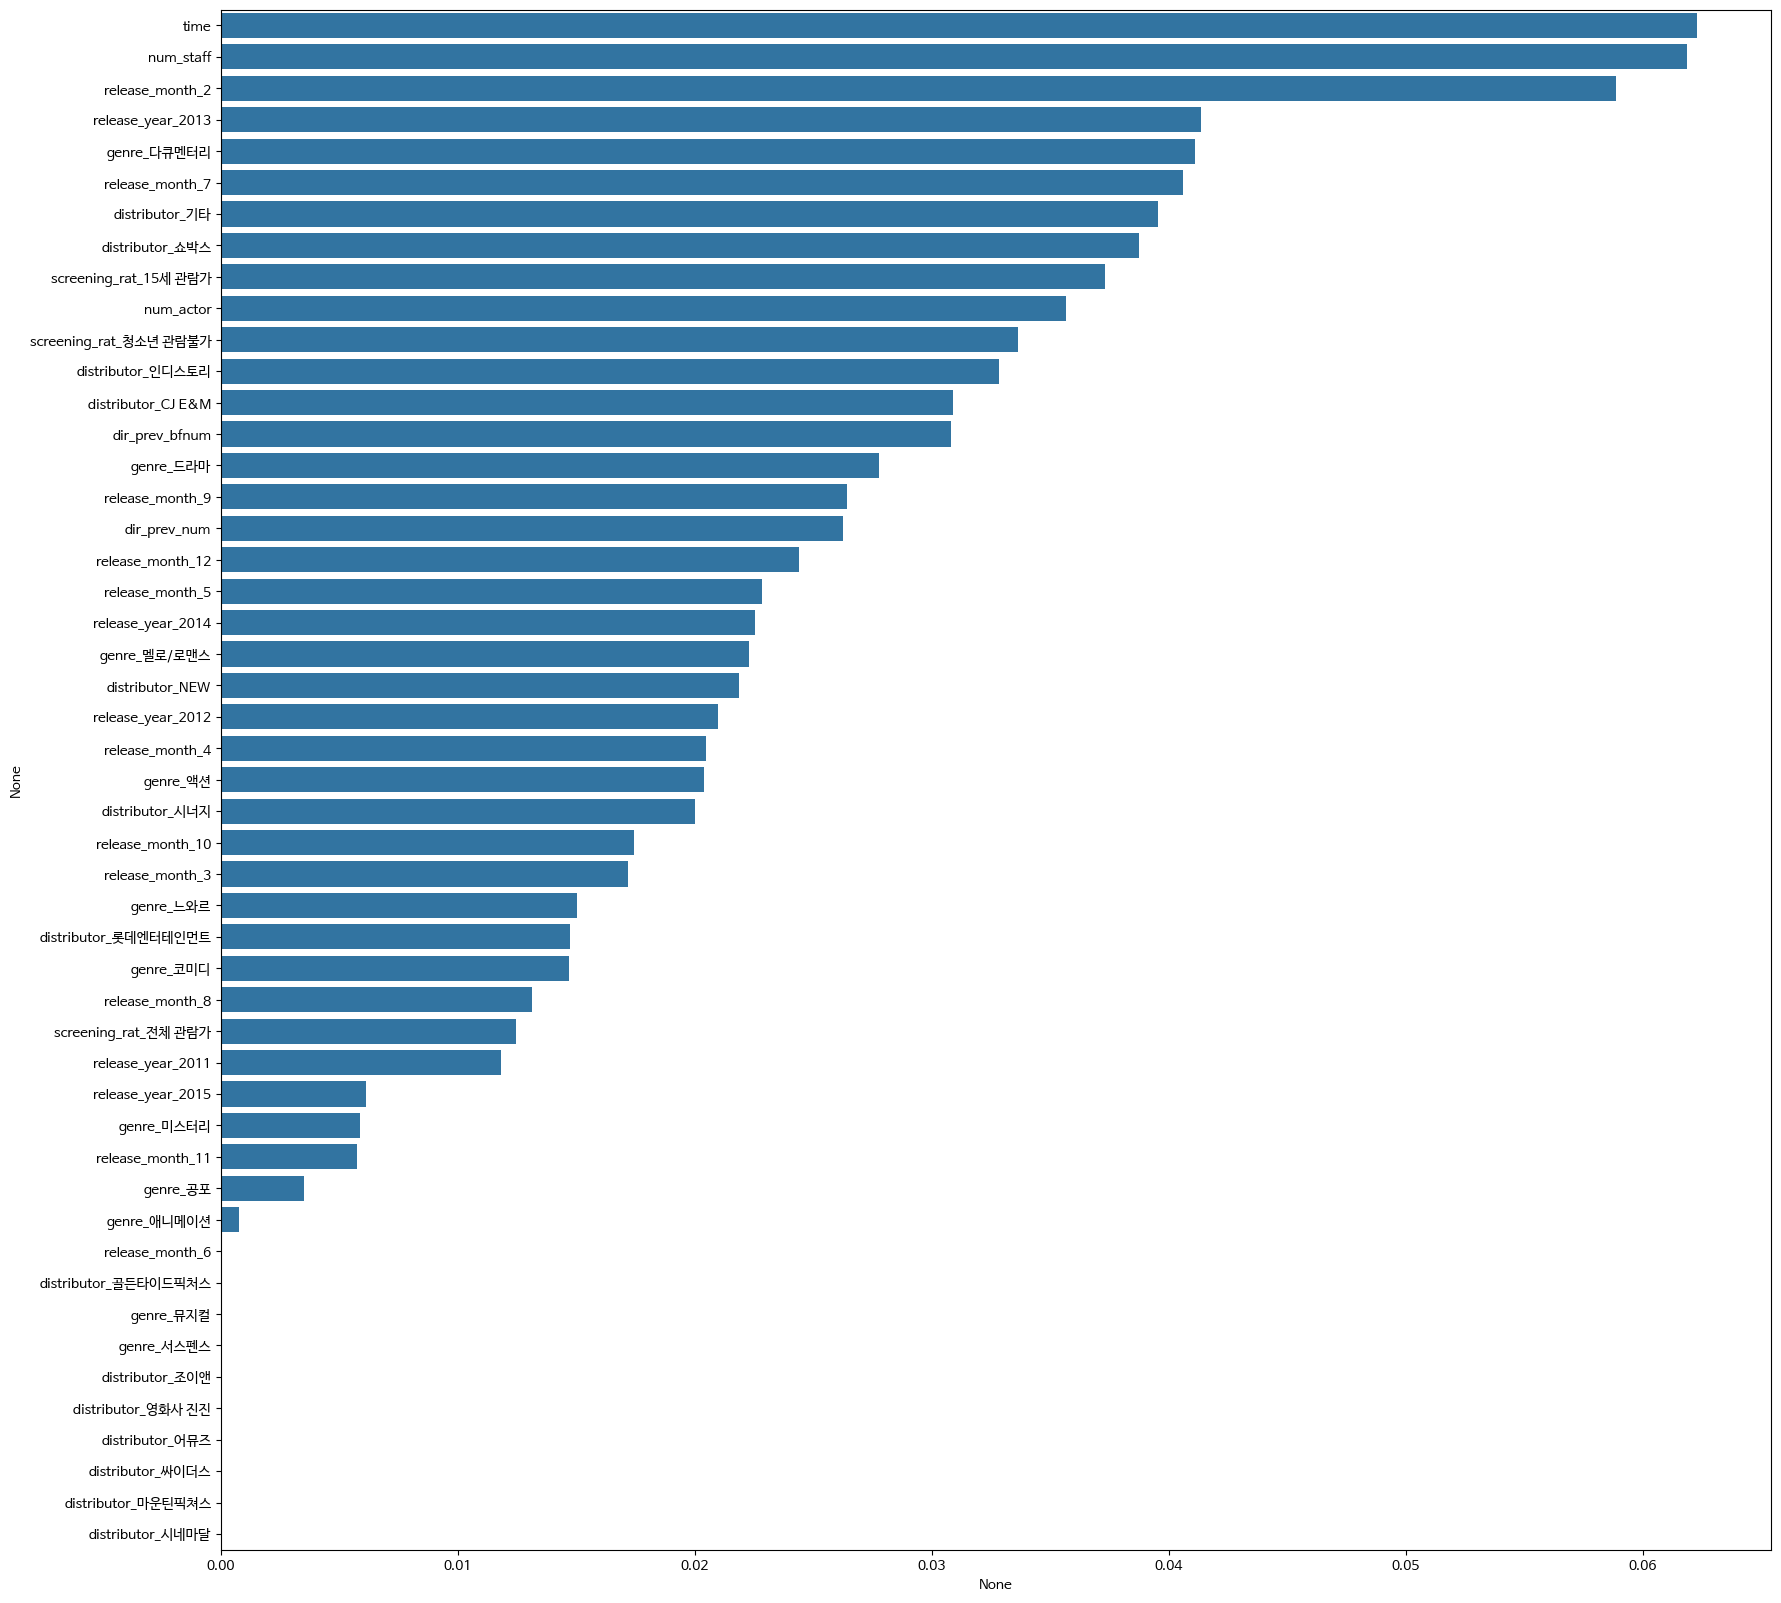

In [53]:
import seaborn as sns
%matplotlib inline
xgb_reg=XGBRegressor(colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.5)
xgb_reg.fit(X_train, y_train)
feature_series=pd.Series(data=xgb_reg.feature_importances_, index=X_train.columns)
feature_series=feature_series.sort_values(ascending=False)
plt.figure(figsize=(20, 20))
sns.barplot(x=feature_series, y=feature_series.index)